In [1]:
import pandas as pd

# Upload from local computer
from google.colab import files
weather_uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv("final_cleaned_traffic_weather.csv")
df.head()

# Get the number of rows and columns
num_rows = len(df)
num_cols = len(df.columns)
attribute_names = df.columns.tolist()

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of attributes (columns): {num_cols}")
print("Attribute names:")
for name in attribute_names:
    print(name)

Saving final_cleaned_traffic_weather.csv to final_cleaned_traffic_weather.csv
Number of rows: 707494
Number of attributes (columns): 19
Attribute names:
Yr
M
D
HH
traffic_volume
date
hour
datetime
conditions
is_rain
is_snow
day_of_week
is_weekend
weather_main
weather_main_code
traffic_volume_scaled
borough
street
location


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['hour', 'day_of_week', 'is_weekend', 'weather_main_code', 'borough', 'traffic_volume_scaled']
x = df[features]
y = df['traffic_volume']

x = pd.get_dummies(x, columns=['borough'])

scaler = StandardScaler()
x[['hour', 'day_of_week', 'weather_main_code', 'traffic_volume_scaled']] = scaler.fit_transform(
    x[['hour', 'day_of_week', 'weather_main_code', 'traffic_volume_scaled']]
)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.203992395705977


In [13]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 1.79


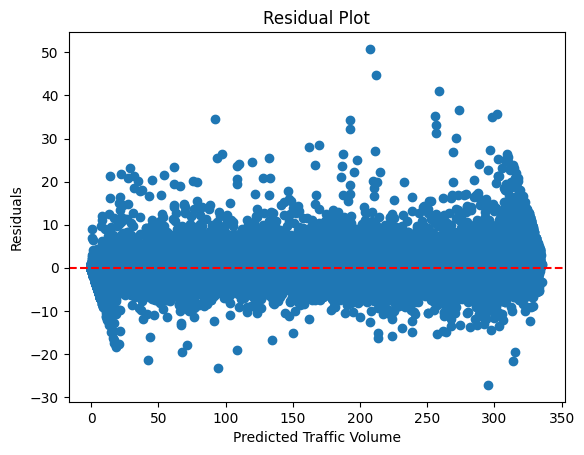

In [15]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Traffic Volume')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
